In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from QDA import LDA,PCA,cross_validation
from QDA.LDA import DA
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [3]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                  names= ['id','thickness','size.unif','shape.unif','adhesion',
                          'size.cell','nuclei','chromatin','nucleoli','mitoses','label'], 
                  na_values="?")
data = data.dropna()

train = data[:404]
test = data[404:]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa96531ce80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa96299ae80>]], dtype=object)

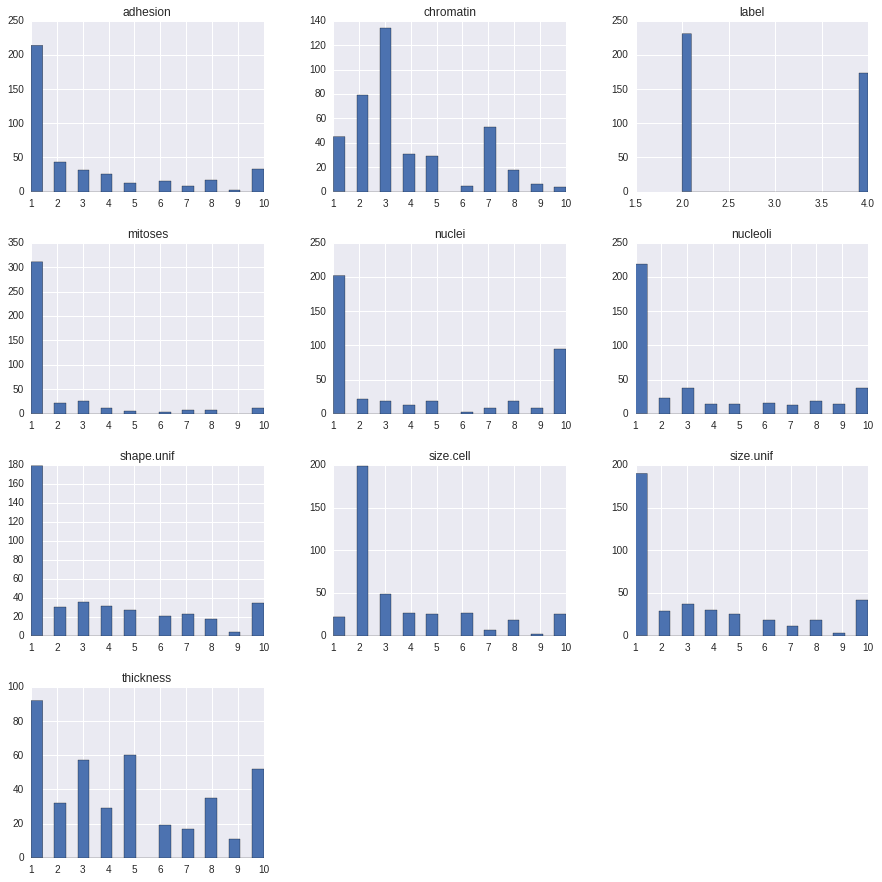

In [4]:
train.ix[:,1:].hist(figsize=(15,15), bins=20)

In [5]:
model = DA(train.values[:, 1:-1], train.values[:,-1], mode='QDA')
model.sampleEstimate()
model.fit()

In [6]:
y_hat, error = model.predict(test.values[:,1:-1], test.values[:,-1])

In [10]:
1-error

0.97491039426523296

In [11]:
X = data.values[:,1:-1]
X = (X - X.mean()) / (X.max() - X.min())

0.76245822859224099

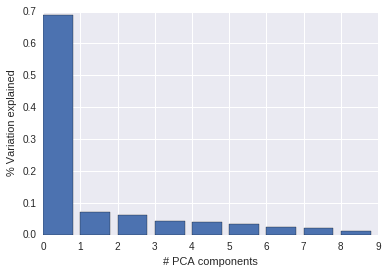

In [20]:
pca = PCA.PCA(X)
plt.bar(range(9),pca.summary(9))
plt.xlabel("# PCA components")
plt.ylabel(" % Variation explained")
sum(pca.summary(2))

In [19]:
x = pca.transform(2)

model2 = DA(x[:404], data.values[:404,-1], mode="QDA")
model2.fit()
pred2 , err2 = model2.predict(x[404:],data.values[404:,-1])
1-err2 

0.967741935483871

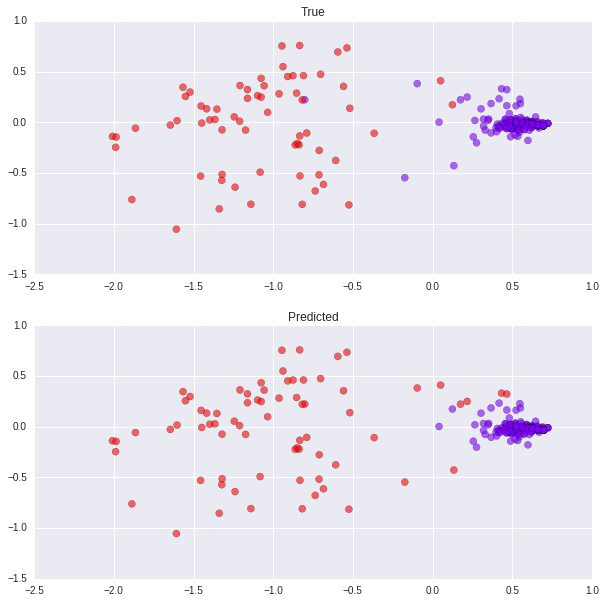

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.scatter(x[404:,0], x[404:,1], s=50, alpha=.6, c=data.label.values[404:] , cmap=plt.cm.rainbow)
plt.title("True")
plt.subplot(2,1,2)
plt.scatter(x[404:,0], x[404:,1],  s=50, alpha=.6, c=pred2, cmap=plt.cm.rainbow)
plt.title("Predicted")


In [18]:
pca3 = PCA.PCA(X)


x = pca.transform(3)

model3 = DA(x[:404], data.values[:404,-1], mode="QDA")
model3.fit()
pred3 , err3 = model3.predict(x[404:],data.values[404:,-1])
1-err3,sum(pca.summary(3))

(0.978494623655914, 0.8230174415690158)

# true label

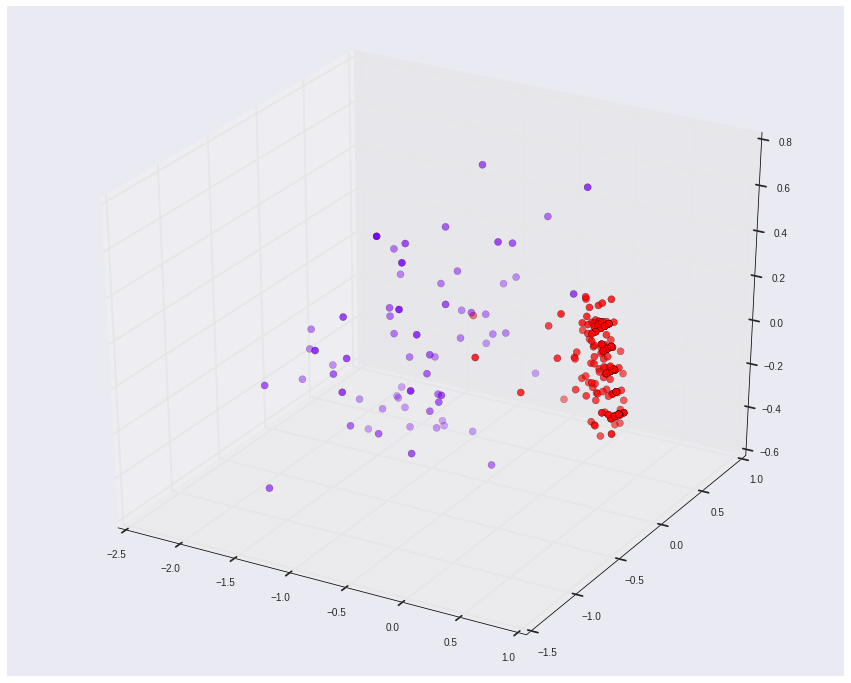

In [16]:
fig = plt.figure()
fig.set_size_inches(15, 12)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[404:,0], x[404:,1], x[404:,2], s=50, c=data.label.values[404:] , cmap=plt.cm.rainbow_r)

# Predicted

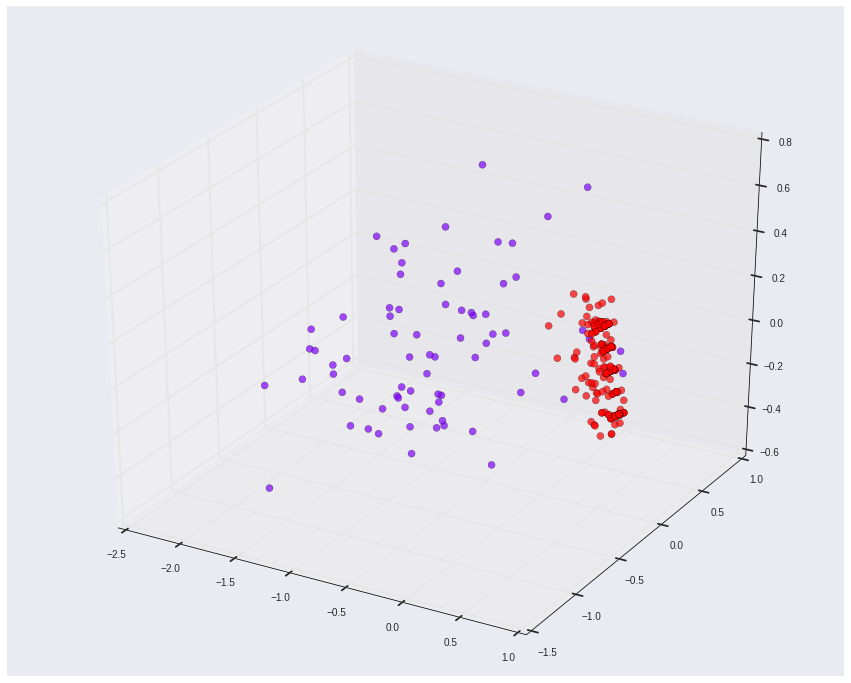

In [17]:

fig = plt.figure()
fig.set_size_inches(15, 12)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[404:,0], x[404:,1], x[404:,2], s=50, alpha=.7, c=pred2, cmap=plt.cm.rainbow_r, label="predicted")